<a href="https://colab.research.google.com/github/namoshi/ml_intro/blob/master/poly_sin_aic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 汎化性（情報量基準AICによるモデル選択）

サイン関数の多項式回帰

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def y(x, W, M):
    Y = np.array([W[i] * (x ** i) for i in range(M+1)])
    return Y.sum()

#(1.2),(1.122),(1.123)
def E(x, t, M):
    A =np.zeros((M+1, M+1))
    for i in range(M+1):
        for j in range(M+1):
            A[i,j] = (x**(i+j)).sum()

    T = np.array([((x**i)*t).sum() for i in range(M+1)])
    return  np.linalg.solve(A, T)

データの生成（20サンプル）

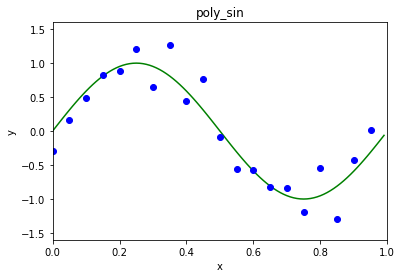

In [8]:
#Sine curve
x_real = np.arange(0, 1, 0.01)
y_real = np.sin(2*np.pi*x_real)

##Training Data
N=20
x_train = np.arange(0, 1, 1.0/N)

#Set "small level of random noise having a Gaussian distribution"
loc = 0
scale = 0.3
y_train =  np.sin(2*np.pi*x_train) + np.random.normal(loc,scale,N)

plt.plot(x_real, y_real, 'g-')
plt.plot(x_train, y_train, 'bo') 
plt.xlim(0.0, 1.0)
plt.ylim(-1.6, 1.6)
plt.title("poly_sin")
plt.xlabel('x')
plt.ylabel('y')
#plt.savefig('poly_sin_cv20.eps')
plt.show()
plt.close()

多項式回帰の当てはめ（モデル選択）

W
 [0.00411469]


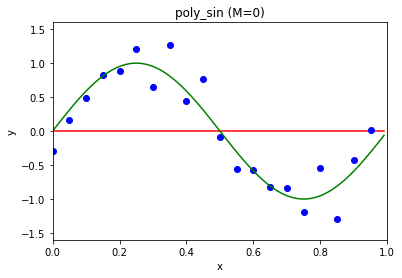

MSE= 0.5818001338274372
AIC= -8.832566057959326
W
 [ 0.81153188 -1.69982565]


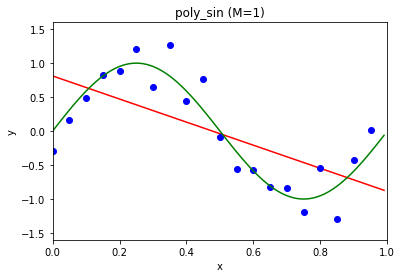

MSE= 0.3416181556587589
AIC= -17.481233391922387
W
 [ 0.5544642   0.01395887 -1.80398371]


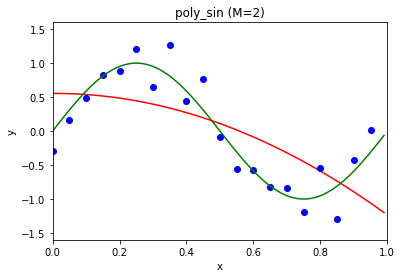

MSE= 0.32376393836892225
AIC= -16.554812280363162
W
 [ -0.44926572  14.59169443 -41.16594141  27.62242646]


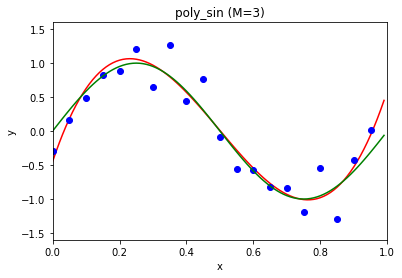

MSE= 0.060718675211115035
AIC= -48.03007928263086
W
 [ -0.34894709  11.84604555 -27.37514886   4.67371943  12.07826686]


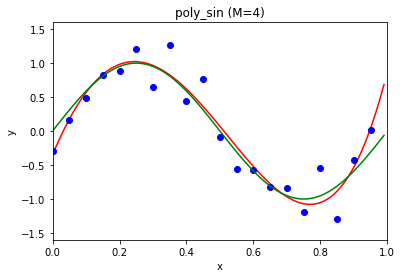

MSE= 0.057653136886166835
AIC= -47.066212423025036
W
 [ -0.28072263   8.52953207  -0.453244   -73.52507057 105.71967504
 -39.42796134]


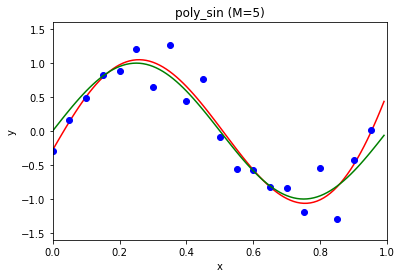

MSE= 0.05571973449302069
AIC= -45.748417902061
W
 [-2.52554412e-01  6.12225382e+00  2.86131721e+01 -2.02491337e+02
  3.65987448e+02 -2.82447907e+02  8.52701564e+01]


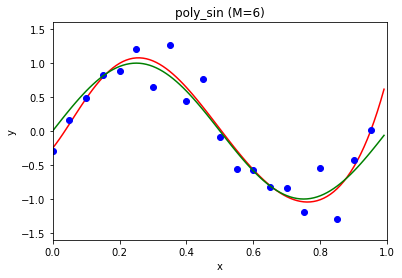

MSE= 0.05520182294480298
AIC= -43.935186037640136
W
 [-3.04380933e-01  1.41214059e+01 -1.06794628e+02  6.45326042e+02
 -2.16775369e+03  3.61621881e+03 -2.89560178e+03  8.96502841e+02]


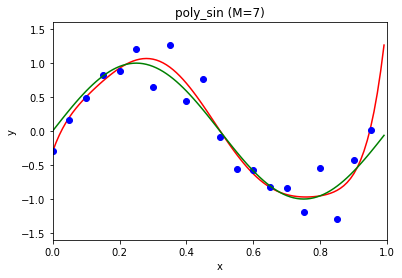

MSE= 0.052045993556251
AIC= -43.11254919732841
W
 [-2.96530492e-01  1.17960246e+01 -5.42781368e+01  2.06637352e+02
 -3.68506847e+02 -4.02390243e+02  2.08904214e+03 -2.32870534e+03
  8.48739023e+02]


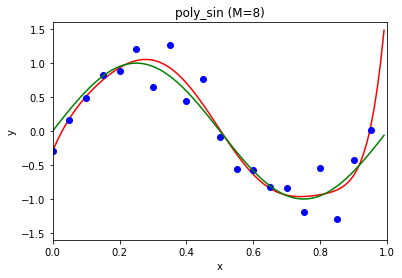

MSE= 0.05189691432840192
AIC= -41.16991889502274
W
 [-2.74451324e-01 -1.98302466e+00  3.42020009e+02 -4.01613745e+03
  2.21740929e+04 -6.82783508e+04  1.22588714e+05 -1.27354906e+05
  7.09427311e+04 -1.63962634e+04]


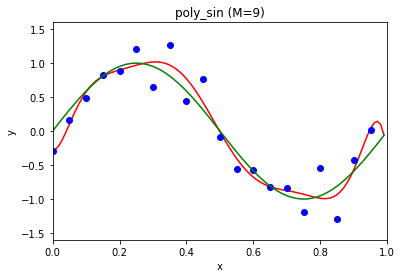

MSE= 0.04911505855539568
AIC= -40.271791992919674
AIC[9]=-40.271792


In [9]:
from sklearn.model_selection import KFold

search_range = [0,1,2,3,4,5,6,7,8,9]

AIC = np.zeros(len(search_range))

for M in search_range:

    W = E(x_train, y_train, M)
    print('W\n', W)

    y_estimate_aic = [y(x, W, M) for x in x_train]

    y_estimate = [y(x, W, M) for x in x_real]

    plt.plot(x_real, y_estimate, 'r-')
    plt.plot(x_train, y_train, 'bo')
    plt.plot(x_real, y_real, 'g-')
    plt.xlim(0.0, 1.0)
    plt.ylim(-1.6, 1.6)
    plt.title("poly_sin (M=%s)" % M)
    plt.xlabel('x')
    plt.ylabel('y')
#    plt.savefig('poly_sin_%d.eps' % M)
    plt.show()
    plt.close()


    mse = (np.square(y_train - y_estimate_aic)).mean()
    print('MSE=', mse)
    AIC[M] = N*np.log(mse) + 2*(M+1)
    print('AIC=', AIC[M])

print('AIC[%d]=%f'% (M, AIC[M]))



AIC
 [ -8.83256606 -17.48123339 -16.55481228 -48.03007928 -47.06621242
 -45.7484179  -43.93518604 -43.1125492  -41.1699189  -40.27179199]
The best order of the model is 3


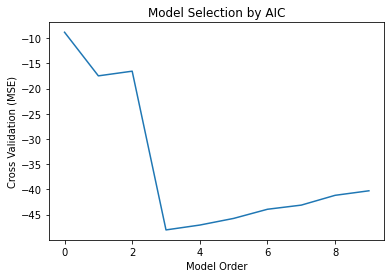

In [10]:
print('AIC\n', AIC)
print('The best order of the model is %d' % (np.argmin(AIC)))
                                                       
                                                       
plt.plot(AIC)
plt.title("Model Selection by AIC")
plt.xlabel('Model Order')
plt.ylabel('Cross Validation (MSE)')
plt.savefig('poly_sin_AIC.eps')
plt.show()
plt.close()
